In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F
df = pd.read_csv("F:/nilu/csv_files/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [108]:
print('Not frauds are ',round(df['Class'].value_counts()[0]/len(df) * 100,2 ),'% of dataset')
print('frauds are ',round(df['Class'].value_counts()[1]/len(df) * 100,2 ),'% of dataset')

Not frauds are  99.83 % of dataset
frauds are  0.17 % of dataset


<Axes: xlabel='Class', ylabel='count'>

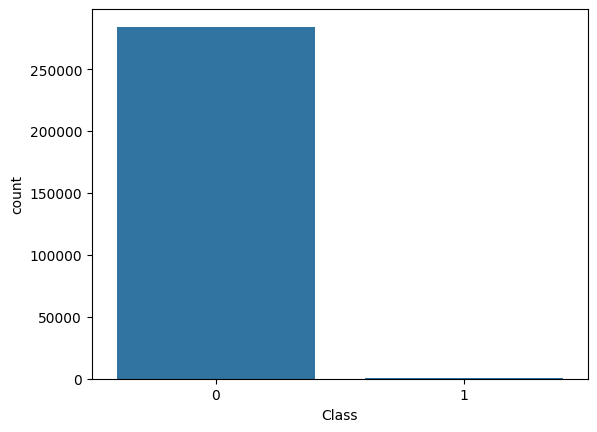

In [109]:
import seaborn as sns
sns.countplot(x="Class",data=df)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,roc_auc_score,roc_curve
def model_statistics(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred=y_pred)
    report = classification_report(y_pred=y_pred,y_true=y_test)
    recall = recall_score(y_true=y_test,y_pred=y_pred)
    print("Confusion Matrix")
    print(cm)
    print("Classification Report")
    print(report)
    print("Recall score",recall)
    print("Accuracy score", accuracy_score(y_test,y_pred))

    thresholds = np.arange(0.0, 1.05, 0.05)  # from 0.0 to 1.0 in 0.05 steps
    recalls = []
    y_scores = model.predict_proba(X_test)[:, 1] 
    for thresh in thresholds:
        y_pred1 = (y_scores >= thresh).astype(int)
        recalls.append(recall_score(y_test, y_pred1))
    fpr,tpr,thresold_roc = roc_curve(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    fig , axes = plt.subplots(1,2,figsize= (12,6))

    axes[0].plot(thresholds, recalls, label="Recall")
    axes[0].set_xlabel('Threshold')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Recall vs Threshold')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_title("ROC Curve")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend()
    axes[1].grid()
    plt.show()

    

In [111]:
scaler = StandardScaler()
df = df.drop('Time',axis=1)
df['Amount'] =scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.dropna(inplace=True)

In [112]:
X = df.drop("Class",axis=1)
y = df["Class"]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Confusion Matrix
[[56851    13]
 [   35    63]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Recall score 0.6428571428571429
Accuracy score 0.9991573329588147


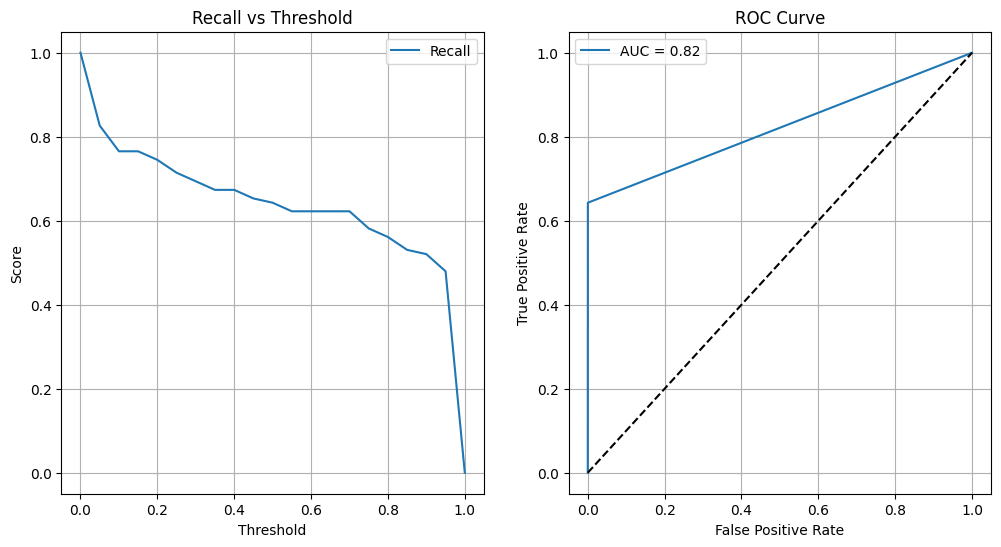

In [113]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')
model_statistics(lr,X_train,y_train,X_test,y_test)

Confusion Matrix
[[56842    22]
 [   15    83]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.85      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Recall score 0.8469387755102041
Accuracy score 0.9993504441557529


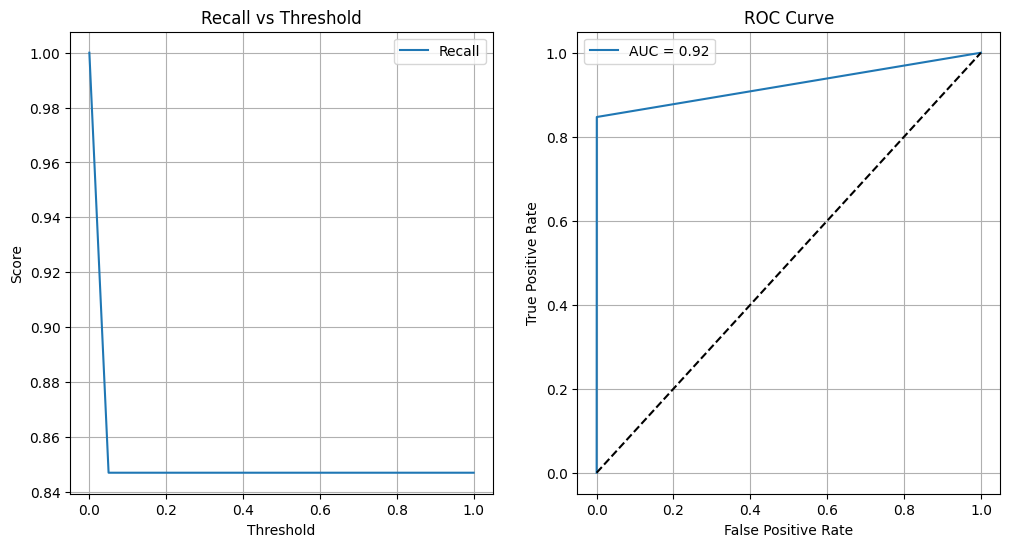

In [114]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy')
model_statistics(dc,X_train,y_train,X_test,y_test)

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [116]:
X_smote ,y_smote = smote.fit_resample(X_train,y_train)

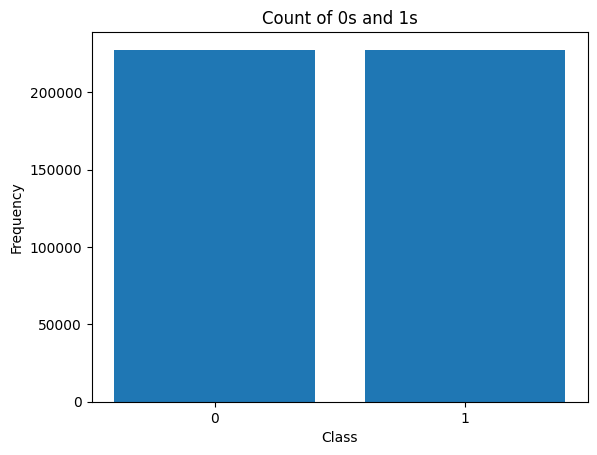

In [117]:
counts = np.bincount(y_smote)

plt.bar([0, 1], counts)
plt.xticks([0, 1])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Count of 0s and 1s")
plt.show()

Confusion Matrix
[[55355  1509]
 [    8    90]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Recall score 0.9183673469387755
Accuracy score 0.9733682103858713


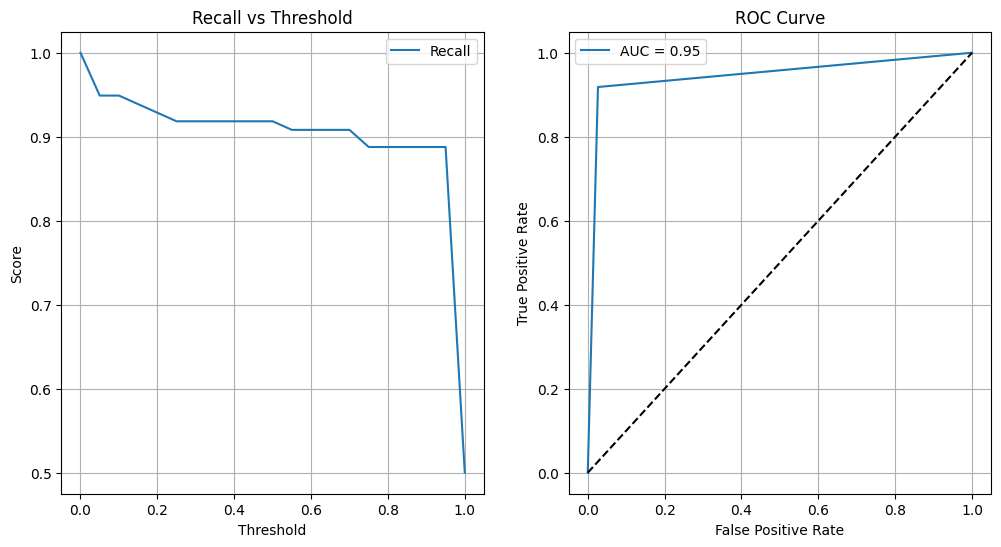

In [118]:
from sklearn.linear_model import LogisticRegression
lr_smote= LogisticRegression()
model_statistics(lr_smote,X_smote,y_smote,X_test,y_test)

In [119]:
class denoiser(nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size,22),
            nn.ReLU(),
            nn.Linear(22,15),
            nn.ReLU(),
            nn.Linear(15,10),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10,15),
            nn.ReLU(),
            nn.Linear(15,22),
            nn.ReLU(),
            nn.Linear(22,input_size),
        )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [120]:
class denoiser_data(Dataset):
    def __init__(self,x):
     super().__init__()
     self.x = torch.tensor(x.values, dtype=torch.float32)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self,idx):
        original_sample = self.x[idx]
        return original_sample

In [121]:
dataset = denoiser_data(X_smote)
dataloader = DataLoader(dataset,batch_size = 128 , shuffle = True)

In [122]:
criterion = nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = denoiser(X_smote.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(),lr=1e-3)

In [123]:
train_loss = []
epochs = 20
from tqdm import tqdm
for epoch in range(epochs):
    model.train()
    training_loss= 0
    for original in tqdm(dataloader):
        noise = 0.1
        original = original.float().to(device)
        noisy = original + torch.randn_like(original)*noise
        noisy = noisy.float().to(device)
        
        optimizer.zero_grad() 
        reconstructed = model(noisy)
        loss = criterion(reconstructed,original)
        loss.backward()
        training_loss += loss.item() * original.size(0) # Accumulate loss weighted by batch size
        optimizer.step()
    train_loss.append(training_loss / len(dataloader.dataset)) # Calculate average loss per sample
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1,train_loss[-1]))

100%|██████████| 3554/3554 [00:14<00:00, 241.29it/s]


Epoch: 1 	Training Loss: 1.030751


100%|██████████| 3554/3554 [00:14<00:00, 243.46it/s]


Epoch: 2 	Training Loss: 0.421484


100%|██████████| 3554/3554 [00:15<00:00, 233.22it/s]


Epoch: 3 	Training Loss: 0.338527


100%|██████████| 3554/3554 [00:13<00:00, 254.89it/s]


Epoch: 4 	Training Loss: 0.304002


100%|██████████| 3554/3554 [00:13<00:00, 260.19it/s]


Epoch: 5 	Training Loss: 0.272903


100%|██████████| 3554/3554 [00:16<00:00, 219.52it/s]


Epoch: 6 	Training Loss: 0.254686


100%|██████████| 3554/3554 [00:14<00:00, 247.15it/s]


Epoch: 7 	Training Loss: 0.238281


100%|██████████| 3554/3554 [00:14<00:00, 248.51it/s]


Epoch: 8 	Training Loss: 0.231050


100%|██████████| 3554/3554 [00:14<00:00, 253.40it/s]


Epoch: 9 	Training Loss: 0.222424


100%|██████████| 3554/3554 [00:14<00:00, 253.15it/s]


Epoch: 10 	Training Loss: 0.210223


100%|██████████| 3554/3554 [00:14<00:00, 248.35it/s]


Epoch: 11 	Training Loss: 0.202701


100%|██████████| 3554/3554 [00:14<00:00, 253.08it/s]


Epoch: 12 	Training Loss: 0.198626


100%|██████████| 3554/3554 [00:14<00:00, 251.70it/s]


Epoch: 13 	Training Loss: 0.196196


100%|██████████| 3554/3554 [00:14<00:00, 252.22it/s]


Epoch: 14 	Training Loss: 0.194267


100%|██████████| 3554/3554 [00:14<00:00, 252.07it/s]


Epoch: 15 	Training Loss: 0.193045


100%|██████████| 3554/3554 [00:14<00:00, 253.41it/s]


Epoch: 16 	Training Loss: 0.191339


100%|██████████| 3554/3554 [00:13<00:00, 255.73it/s]


Epoch: 17 	Training Loss: 0.190067


100%|██████████| 3554/3554 [00:14<00:00, 253.54it/s]


Epoch: 18 	Training Loss: 0.189404


100%|██████████| 3554/3554 [00:14<00:00, 251.06it/s]


Epoch: 19 	Training Loss: 0.188193


100%|██████████| 3554/3554 [00:14<00:00, 251.02it/s]

Epoch: 20 	Training Loss: 0.187269


In [124]:
model.eval()

with torch.no_grad():
    X_train_denoised = model(torch.tensor(X_smote.values,dtype=torch.float32).to(device)).cpu().numpy()
    X_test_denoised = model(torch.tensor(X_test.values,dtype=torch.float32).to(device)).cpu().numpy()
    

In [125]:
class classifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size,22),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(22,15),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(15,10),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(5,2),
        )
    def forward(self,x):
        return self.sequential(x)

In [126]:
class classifer_data(Dataset):
    def __init__(self,x,y):
     super().__init__()
     self.x = x
     self.y = torch.tensor(y.values, dtype=torch.long)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [127]:
dataset = classifer_data(X_train_denoised, y_smote)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

clf = classifier(X_train_denoised.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3,weight_decay=1e-4)

for epoch in range(20):
    clf.train()
    total_loss = 0
    for x_batch, y_batch in tqdm(loader):
        optimizer.zero_grad()
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = clf(x_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {total_loss/len(loader):.4f}")


100%|██████████| 3554/3554 [00:16<00:00, 215.74it/s]


Epoch 1 - Loss: 0.1259


100%|██████████| 3554/3554 [00:15<00:00, 223.70it/s]


Epoch 2 - Loss: 0.0653


100%|██████████| 3554/3554 [00:16<00:00, 217.48it/s]


Epoch 3 - Loss: 0.0563


100%|██████████| 3554/3554 [00:16<00:00, 217.62it/s]


Epoch 4 - Loss: 0.0520


100%|██████████| 3554/3554 [00:16<00:00, 217.53it/s]


Epoch 5 - Loss: 0.0492


100%|██████████| 3554/3554 [00:16<00:00, 217.23it/s]


Epoch 6 - Loss: 0.0476


100%|██████████| 3554/3554 [00:16<00:00, 221.55it/s]


Epoch 7 - Loss: 0.0471


100%|██████████| 3554/3554 [00:16<00:00, 219.86it/s]


Epoch 8 - Loss: 0.0451


100%|██████████| 3554/3554 [00:16<00:00, 219.01it/s]


Epoch 9 - Loss: 0.0456


100%|██████████| 3554/3554 [00:16<00:00, 214.35it/s]


Epoch 10 - Loss: 0.0446


100%|██████████| 3554/3554 [00:16<00:00, 214.31it/s]


Epoch 11 - Loss: 0.0442


100%|██████████| 3554/3554 [00:16<00:00, 214.86it/s]


Epoch 12 - Loss: 0.0433


100%|██████████| 3554/3554 [00:17<00:00, 204.27it/s]


Epoch 13 - Loss: 0.0426


100%|██████████| 3554/3554 [00:16<00:00, 218.48it/s]


Epoch 14 - Loss: 0.0419


100%|██████████| 3554/3554 [00:16<00:00, 218.81it/s]


Epoch 15 - Loss: 0.0413


100%|██████████| 3554/3554 [00:16<00:00, 218.80it/s]


Epoch 16 - Loss: 0.0424


100%|██████████| 3554/3554 [00:16<00:00, 216.60it/s]


Epoch 17 - Loss: 0.0410


100%|██████████| 3554/3554 [00:16<00:00, 217.78it/s]


Epoch 18 - Loss: 0.0411


100%|██████████| 3554/3554 [00:16<00:00, 218.62it/s]


Epoch 19 - Loss: 0.0414


100%|██████████| 3554/3554 [00:17<00:00, 208.16it/s]

Epoch 20 - Loss: 0.0403


In [128]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score

clf.eval()
with torch.no_grad():
    logits = clf(torch.tensor(X_test_denoised, dtype=torch.float32).to(device)).cpu()
    preds_class = logits.argmax(dim=1)

y_true = np.array(y_test).astype(int)

print(classification_report(y_true, preds_class))
print("AUC:", roc_auc_score(y_true, logits[:, 1]))  # Use class-1 scores
print("Recall score:", recall_score(y_true, preds_class))
print("Confusion matrix:\n", confusion_matrix(y_true, preds_class))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

AUC: 0.9759546228451988
Recall score: 0.8877551020408163
Confusion matrix:
 [[56213   651]
 [   11    87]]


Confusion Matrix
[[56213   651]
 [   11    87]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Recall score 0.8877551020408163


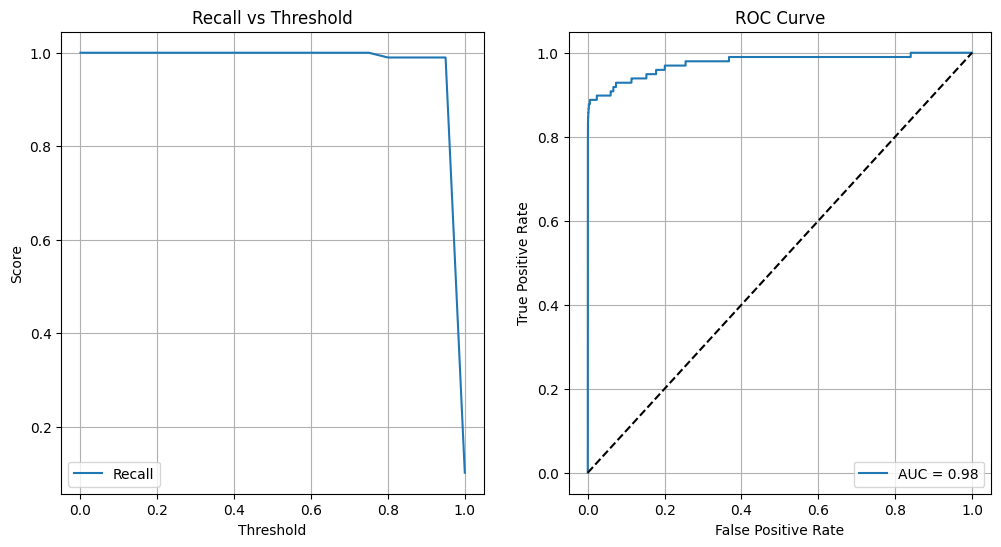

In [132]:
from sklearn.metrics import precision_score
clf.eval()
with torch.no_grad():
    logits = clf(torch.tensor(X_test_denoised, dtype=torch.float32).to(device)).cpu()
    prob = F.softmax(logits,dim=1)
    y_pred_probs, preds_class = prob.max(dim=1)
    y_pred_probs = y_pred_probs.numpy()
    #y_pred = y_pred_probs.numpy()
y_true = np.array(y_test).astype(int)
cm = confusion_matrix(y_true,y_pred=preds_class)
report = classification_report(y_pred=preds_class,y_true=y_true)
recall = recall_score(y_true=y_true,y_pred=preds_class)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(report)
print("Recall score",recall)

thresholds = np.arange(0.0, 1.05, 0.05)  # from 0.0 to 1.0 in 0.05 steps
recalls = []

for thresh in thresholds:
    y_pred = (y_pred_probs >= thresh).astype(int)
    recalls.append(recall_score(y_true, y_pred))
fpr,tpr,thresold_roc = roc_curve(y_true,logits[:, 1])
roc_auc = roc_auc_score(y_true,logits[:, 1])
fig , axes = plt.subplots(1,2,figsize= (12,6))

axes[0].plot(thresholds, recalls, label="Recall")
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].set_title('Recall vs Threshold')
axes[0].legend()
axes[0].grid(True)
    
axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid()
plt.show()

In [137]:
torch.save(model.state_dict(), 'Denoiser.pt')
torch.save(clf.state_dict(), 'Classifier.pt')  
